In [3]:
import image_anomaly_detection as iad

import torch
# import cv2
from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt
# import torchvision
# from tqdm import tqdm
# import numpy as np
# import torch.nn.functional as F

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import precision_recall_curve


In [4]:
class_name = 'bottle'
data_path = '../../data/mvtec_dataset/' 
test_dataset = iad.MVTecDataset(data_path, class_name, is_train=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, pin_memory=True)
print("Number of images in dataset:", len(test_dataloader.dataset))

Number of images in dataset: 83


In [5]:
distributions_path = '../distributions/'
embedding_coreset = torch.load(distributions_path+'bottle_embedding_coreset.pt')

In [6]:
model = iad.PatchCore('resnet18', embedding_coreset=embedding_coreset)

In [7]:
images, image_classifications_target, masks_target, image_scores, score_maps = iad.eval_data(model, test_dataloader)

Inference:   0%|          | 0/3 [00:00<?, ?it/s]/home/plejd/anaconda3/envs/vision/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Inference: 100%|██████████| 3/3 [00:10<00:00,  3.61s/it]


------------------------------------Image level---------------------------------------------
ROC-AUC score: 1.0

Optimal thresh: 2.02886
Recall: 1.0
Precision: 1.0


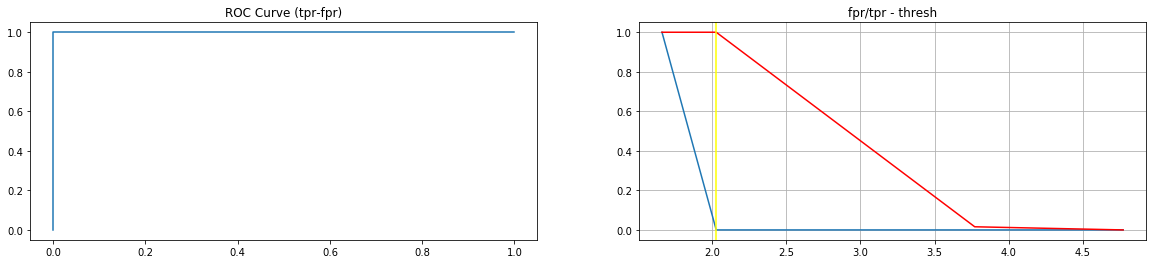



------------------------------------Pixel level---------------------------------------------
ROC-AUC score: 0.976402277203457

Optimal thresh: 2.3180985
Recall: 0.7570801123590424
Precision: 0.573271772599765


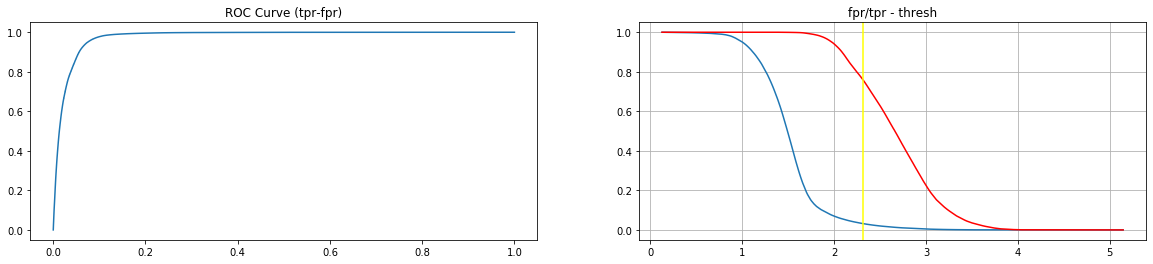

In [8]:
iad.visualize_eval_data(image_classifications_target, masks_target, image_scores, score_maps)

In [9]:
distributions_path = '../distributions/'
mean = torch.load(distributions_path+'bottle_mean.pt')
cov_inv = torch.load(distributions_path+'bottle_cov_inv.pt')

In [10]:
model = iad.Padim(backbone='resnet18', mean=mean, cov_inv=cov_inv, device=torch.device('cpu'))

In [11]:
images, image_classifications_target, masks_target, image_scores, score_maps = iad.eval_data(model, test_dataloader)

Inference: 100%|██████████| 3/3 [00:09<00:00,  3.25s/it]


------------------------------------Image level---------------------------------------------
ROC-AUC score: 0.996031746031746

Optimal thresh: 16.869349
Recall: 1.0
Precision: 0.984375


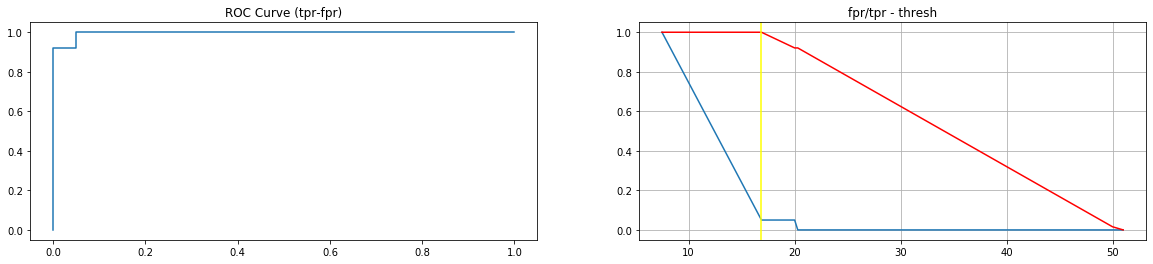



------------------------------------Pixel level---------------------------------------------
ROC-AUC score: 0.9840468286438052

Optimal thresh: 14.131464
Recall: 0.8013904657653216
Precision: 0.6387621997166169


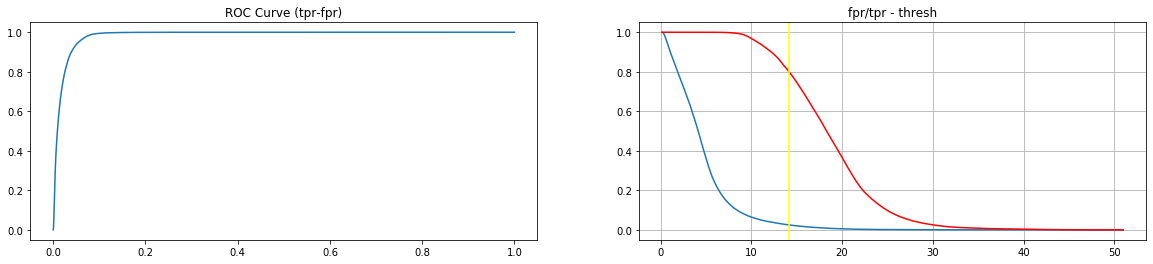

In [12]:
iad.visualize_eval_data(image_classifications_target, masks_target, image_scores, score_maps)